In [25]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123502 sha256=7fb3d08ca40c0fae219ed6c22a13cce5e7171e436602cb7c7668f44d6caa9088
  Stored in directory: /tmp/pip-ephem-wheel-cache-31x22a24/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


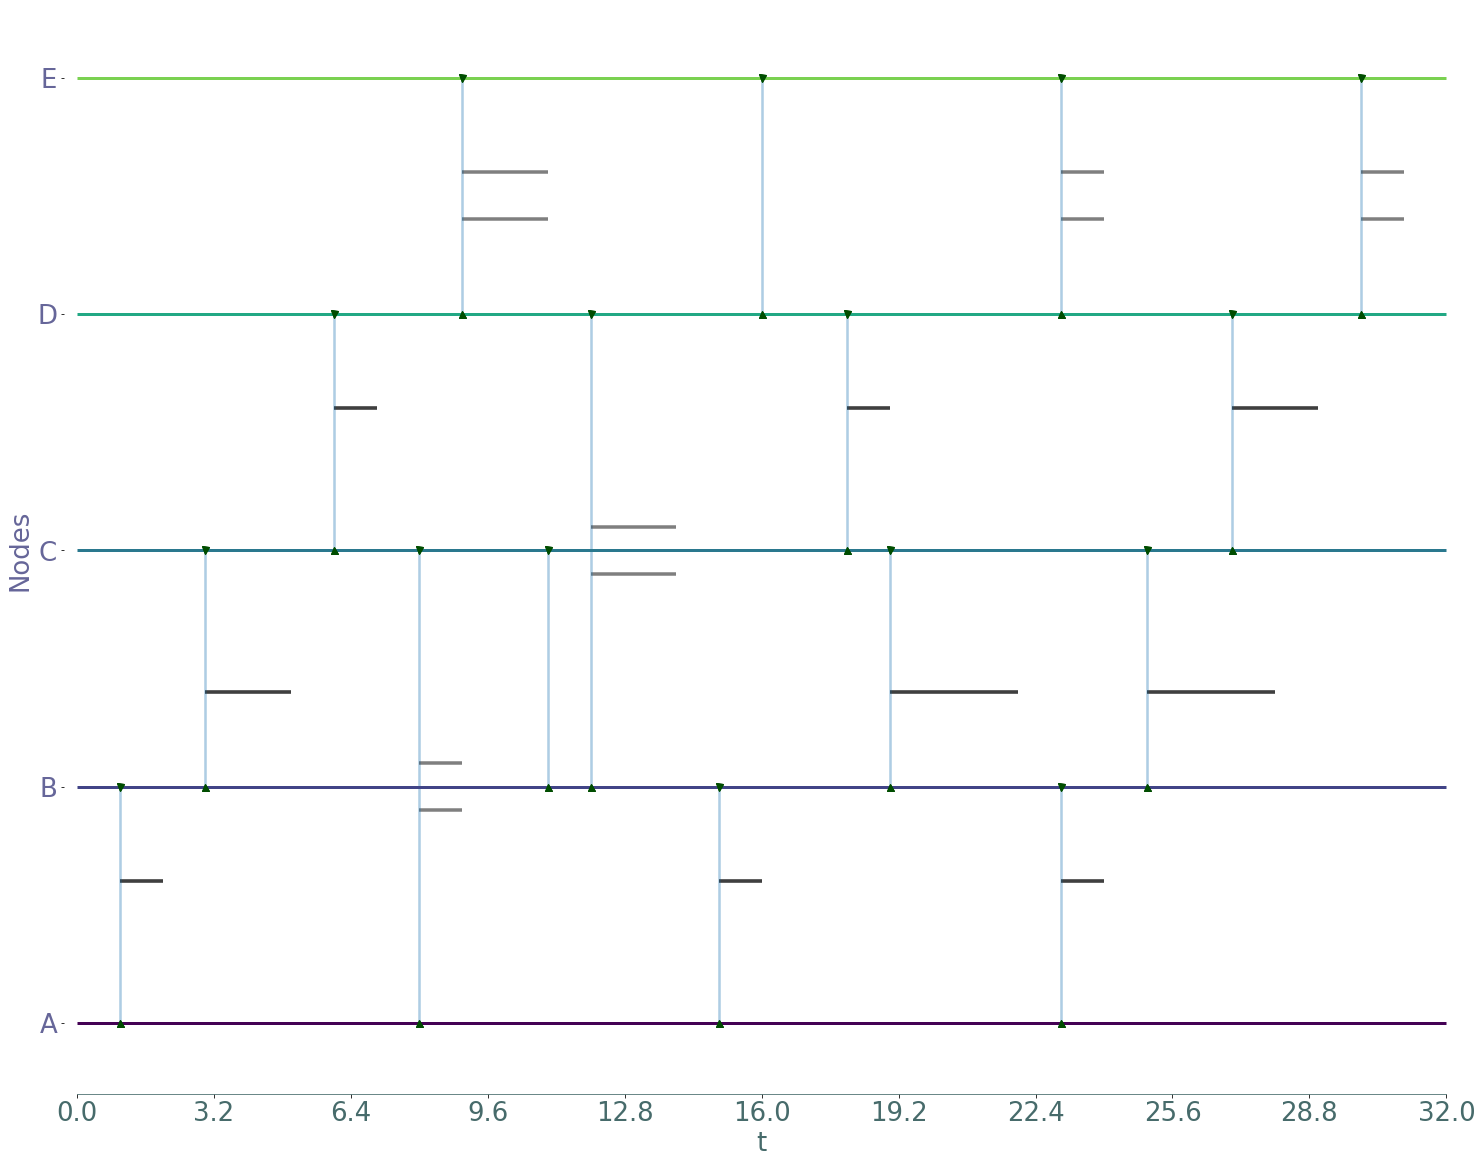

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [4]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [5]:
events, events_reverse = bt.events_dic(nouveau)

In [6]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
node = 0

In [9]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [10]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [11]:
lat_triplet[1]

[[1.0, 1.0, 1],
 [2.0, 2.0, 1],
 [9.0, 11.0, 2],
 [15.0, 15.0, 1],
 [16.0, 16.0, 1],
 [23.0, 23.0, 1],
 [24.0, 24.0, 1]]

In [12]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

********** (9.0, 11.0) **************
[(3, 6.0), (3, 7.0), (4, 11.0)]
///////////////////////
(4, 11.0) {} {(4, 11.0)}
(3, 7.0) {} {(3, 7.0)}
(4, 11.0) {} {(3, 7.0)}
(3, 6.0) {} {(3, 6.0)}
(4, 11.0) {} {(3, 6.0)}
********** (6.0, 7.0) **************
[(2, 3.0), (2, 5.0), (3, 7.0)]
///////////////////////
(3, 7.0) {} {(3, 7.0)}
(2, 5.0) {} {(2, 5.0)}
(3, 7.0) {} {(2, 5.0)}
(2, 3.0) {} {(2, 3.0)}
(3, 7.0) {} {(2, 3.0)}
********** (3.0, 5.0) **************
[(1, 2.0), (2, 5.0)]
///////////////////////
(2, 5.0) {} {(2, 5.0)}
(1, 2.0) {} {(1, 2.0)}
(2, 5.0) {} {(1, 2.0)}
********** (18.0, 19.0) **************
[(2, 19.0), (3, 19.0)]
///////////////////////
(3, 19.0) {} {(3, 19.0)}
(2, 19.0) {} {(2, 19.0)}
(3, 19.0) {} {(2, 19.0)}
********** (23.0, 24.0) **************
[(3, 19.0), (4, 24.0)]
///////////////////////
(4, 24.0) {} {(4, 24.0)}
(3, 19.0) {} {(3, 19.0)}
(4, 24.0) {} {(3, 19.0)}
********** (19.0, 22.0) **************
[(1, 16.0), (2, 22.0)]
///////////////////////
(2, 22.0) {} {(2, 22.

In [13]:
for e in GT:
    print(e,list(GT[e].nodes()))

(9.0, 11.0) [(3, 6.0), (4, 11.0), (3, 7.0)]
(6.0, 7.0) [(2, 3.0), (3, 7.0), (2, 5.0)]
(3.0, 5.0) [(1, 2.0), (2, 5.0)]
(18.0, 19.0) [(2, 19.0), (3, 19.0)]
(23.0, 24.0) [(3, 19.0), (4, 24.0)]
(19.0, 22.0) [(1, 16.0), (2, 22.0)]
(30.0, 31.0) [(3, 27.0), (4, 31.0), (3, 28.0), (3, 29.0)]
(27.0, 28.0) [(2, 25.0), (3, 28.0), (2, 27.0), (1, 24.0), (2, 28.0)]
(28.0, 29.0) [(2, 25.0), (3, 29.0), (2, 27.0), (2, 28.0)]
(25.0, 27.0) [(1, 24.0), (2, 27.0)]
(12.0, 14.0) [(1, 11.0), (3, 14.0)]


In [14]:
GT[(15.0, 16.0)].successors((1, 14.0))

KeyError: (15.0, 16.0)

In [15]:
edge = bt.edges(nouveau)
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse,edge)
mx = bt.max_volume_superposition(GT)
print(mx)

0 1 1.0 -1 -1 -1 -1
edge after 1.0 2.0
t1p,t2p 1.0 1.0
0 1 2.0 -1 -1 -1 -1
t1p,t2p 1.0 2.0
1 2 2.0 1.0 2.0 -2 -1
edge after 3.0 5.0
t1p,t2p 3.0 3.0
1 2 2.0 1.0 2.0 -2 -1
t1p,t2p 3.0 5.0
0 1 15.0 -1 -1 -1 -1
edge after 15.0 16.0
t1p,t2p 15.0 15.0
0 1 16.0 -1 -1 -1 -1
t1p,t2p 15.0 16.0
1 2 16.0 15.0 16.0 -2 -1
edge after 19.0 22.0
t1p,t2p 19.0 19.0
1 2 16.0 15.0 16.0 -2 -1
t1p,t2p 19.0 22.0
0 1 23.0 -1 -1 -1 -1
edge after 23.0 24.0
t1p,t2p 23.0 23.0
0 1 24.0 -1 -1 -1 -1
t1p,t2p 23.0 24.0
1 2 24.0 23.0 24.0 -2 -1
edge after 25.0 27.0
t1p,t2p 25.0 25.0
1 2 24.0 23.0 24.0 -2 -1
edge after 27.0 28.0
t1p,t2p 25.0 27.0
1 2 24.0 23.0 24.0 -2 -1
t1p,t2p 27.0 28.0
0 2 8.0 -1 -1 -1 -1
edge after 8.0 9.0
t1p,t2p 8.0 8.0
0 2 9.0 -1 -1 -1 -1
t1p,t2p 8.0 9.0
2 1 9.0 8.0 9.0 -2 -1
t1p,t2p 11.0 11.0
2 3 9.0 8.0 9.0 -2 -1
edge after 18.0 19.0
t1p,t2p 18.0 18.0
2


In [16]:
before[1]

{0.0: False,
 1.0: False,
 2.0: True,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: True,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: True,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [17]:
after[1]

{0.0: False,
 1.0: True,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: True,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: True,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [18]:
before[2]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: True,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [19]:
after[2]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: True,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [20]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [21]:
sigma_r

{(0, 0.0): vol(1,0),
 (0, 1.0): vol(1,0),
 (0, 2.0): vol(1,0),
 (0, 3.0): vol(1,0),
 (0, 5.0): vol(1,0),
 (0, 6.0): vol(1,0),
 (0, 7.0): vol(1,0),
 (0, 8.0): vol(1,0),
 (0, 9.0): vol(1,0),
 (0, 11.0): vol(1,0),
 (0, 12.0): vol(1,0),
 (0, 14.0): vol(1,0),
 (0, 15.0): vol(1,0),
 (0, 16.0): vol(1,0),
 (0, 18.0): vol(1,0),
 (0, 19.0): vol(1,0),
 (0, 22.0): vol(1,0),
 (0, 23.0): vol(1,0),
 (0, 24.0): vol(1,0),
 (0, 25.0): vol(1,0),
 (0, 27.0): vol(1,0),
 (0, 28.0): vol(1,0),
 (0, 29.0): vol(1,0),
 (0, 30.0): vol(1,0),
 (0, 31.0): vol(1,0),
 (0, 32.0): vol(1,0),
 (1, 0.0): vol(0,0),
 (1, 1.0): vol(1,0),
 (1, 2.0): vol(1,0),
 (1, 3.0): vol(1,0),
 (1, 5.0): vol(1,0),
 (1, 6.0): vol(1,0),
 (1, 7.0): vol(1,0),
 (1, 8.0): vol(1,0),
 (1, 9.0): vol(1,0),
 (1, 11.0): vol(1,0),
 (1, 12.0): vol(1,0),
 (1, 14.0): vol(1,0),
 (1, 15.0): vol(1,0),
 (1, 16.0): vol(1,0),
 (1, 18.0): vol(1,0),
 (1, 19.0): vol(1,0),
 (1, 22.0): vol(1,0),
 (1, 23.0): vol(1,0),
 (1, 24.0): vol(1,0),
 (1, 25.0): vol(1,0),
 (1, 2

In [22]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [23]:
contri[1]

{1.0: (0.0, 1.0),
 2.0: (2.0, 15.0),
 11.0: (2.0, 15.0),
 15.0: (2.0, 15.0),
 16.0: (16.0, 23.0),
 23.0: (16.0, 23.0),
 24.0: (24.0, 32.0)}

In [24]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [29]:
deltasvvt

{(0, 1.0): vol(0,0),
 (1, 1.0): vol(0,0),
 (0, 2.0): vol(0,0),
 (1, 2.0): vol(0,0),
 (2, 9.0): vol(0,0),
 (1, 11.0): vol(28.0,0),
 (0, 15.0): vol(0,0),
 (1, 15.0): vol(0,0),
 (0, 16.0): vol(0,0),
 (1, 16.0): vol(0,0),
 (0, 23.0): vol(0,0),
 (1, 23.0): vol(0,0),
 (0, 24.0): vol(0,0),
 (1, 24.0): vol(0,0),
 (2, 3.0): vol(10.0,0),
 (2, 5.0): vol(0,0),
 (0, 8.0): vol(0,0),
 (2, 8.0): vol(0,0),
 (0, 9.0): vol(0,0),
 (2, 19.0): vol(42.0,0),
 (2, 22.0): vol(0,0),
 (2, 25.0): vol(105.0,0),
 (2, 27.0): vol(0,0),
 (2, 28.0): vol(0,0),
 (3, 6.0): vol(12.0,0),
 (3, 7.0): vol(0,0),
 (3, 12.0): vol(99.0,0),
 (3, 14.0): vol(0,0),
 (3, 18.0): vol(0,0),
 (3, 19.0): vol(92.0,0),
 (3, 27.0): vol(120.0,0),
 (3, 28.0): vol(0,0),
 (3, 29.0): vol(0,0),
 (4, 9.0): vol(42.0,0),
 (4, 11.0): vol(0,0),
 (4, 16.0): vol(98.0,0),
 (4, 23.0): vol(49.0,0),
 (4, 24.0): vol(0,0),
 (4, 30.0): vol(48.0,0),
 (4, 31.0): vol(0,0)}

In [30]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

In [31]:
contribution

{1: {1.0: vol(0,0),
  5.0: vol(0,0),
  3.0: vol(64.0,0),
  2.0: vol(64.0,0),
  15.0: vol(0,0),
  22.0: vol(0,0),
  18.0: vol(183.0,0),
  19.0: vol(183.0,0),
  16.0: vol(183.0,0),
  23.0: vol(0,0),
  28.0: vol(0,0),
  27.0: vol(13.09090909090909,0),
  25.0: vol(273.0,0),
  24.0: vol(273.0,0),
  14.0: vol(0,0),
  12.0: vol(197.0,0),
  11.0: vol(225.0,0),
  0.0: vol(0,0),
  6.0: vol(0,0),
  7.0: vol(0,0),
  8.0: vol(0,0),
  9.0: vol(0,0),
  29.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  32.0: vol(0,0)},
 0: {1.0: vol(0,0),
  2.0: vol(64.0,0),
  15.0: vol(0,0),
  16.0: vol(183.0,0),
  23.0: vol(0,0),
  24.0: vol(273.0,0),
  8.0: vol(0,0),
  9.0: vol(225.0,0),
  0.0: vol(0,0),
  3.0: vol(0,0),
  5.0: vol(0,0),
  6.0: vol(0,0),
  7.0: vol(0,0),
  11.0: vol(0,0),
  12.0: vol(0,0),
  14.0: vol(0,0),
  18.0: vol(0,0),
  19.0: vol(0,0),
  22.0: vol(0,0),
  25.0: vol(0,0),
  27.0: vol(0,0),
  28.0: vol(0,0),
  29.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  32.0: vol(0,0)},
 4: {11.0

In [34]:
contribution[0]

{1.0: vol(0,0),
 2.0: vol(64.0,0),
 15.0: vol(0,0),
 16.0: vol(183.0,0),
 23.0: vol(0,0),
 24.0: vol(273.0,0),
 8.0: vol(0,0),
 9.0: vol(225.0,0),
 0.0: vol(0,0),
 3.0: vol(0,0),
 5.0: vol(0,0),
 6.0: vol(0,0),
 7.0: vol(0,0),
 11.0: vol(0,0),
 12.0: vol(0,0),
 14.0: vol(0,0),
 18.0: vol(0,0),
 19.0: vol(0,0),
 22.0: vol(0,0),
 25.0: vol(0,0),
 27.0: vol(0,0),
 28.0: vol(0,0),
 29.0: vol(0,0),
 30.0: vol(0,0),
 31.0: vol(0,0),
 32.0: vol(0,0)}